# BPL_IEC_validation script with PyFMI

The key library PyFMI is installed.

After the installation a small application BPL_IEC_validation is loaded and run. You can continue with this example if you like.

In [1]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


In [2]:
%env PYTHONPATH=

env: PYTHONPATH=


In [3]:
!python --version

Python 3.12.11


In [4]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py312_25.5.1-1-Linux-x86_64.sh
!chmod +x Miniconda3-py312_25.5.1-1-Linux-x86_64.sh
!bash ./Miniconda3-py312_25.5.1-1-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.12/site-packages/')

--2025-08-20 13:49:31--  https://repo.anaconda.com/miniconda/Miniconda3-py312_25.5.1-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155011870 (148M) [application/octet-stream]
Saving to: ‘Miniconda3-py312_25.5.1-1-Linux-x86_64.sh’

Miniconda3-py312_25 100%[===================>] 147.83M  92.9MB/s    in 1.6s    

2025-08-20 13:49:32 (92.9 MB/s) - ‘Miniconda3-py312_25.5.1-1-Linux-x86_64.sh’ saved [155011870/155011870]

PREFIX=/usr/local
Unpacking payload ...
entry_point.py:256: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
entry_point.py:256: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify 

In [5]:
!conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/main
!conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/r
!conda update -n base -c defaults conda --yes

accepted Terms of Service for https://repo.anaconda.com/pkgs/main
accepted Terms of Service for https://repo.anaconda.com/pkgs/r
2 channel Terms of Service accepted
Channels:
 - defaults
Platform: linux-64
Solving environment: \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.7.15  |       h06a4308_0         126 KB
    certifi-2025.8.3           |  py312h06a4308_0         159 KB
    conda-25.7.0               |  py312h06a4308_0         1.2 MB
    openssl-3.0.17             |       h5eee18b_0         5.2 MB
    ------------------------------------------------------------
                                           Total:         6.7 MB

The following packages will be UPDATED:

  ca-certificates                      2025.2.25-h06a4308_0 --> 2025.7.15-h06a4308_0 
  

In [6]:
!conda --version
!python --version

conda 25.7.0
Python 3.12.11


In [7]:
!conda config --set channel_priority strict

In [8]:
!conda install -c conda-forge pyfmi --yes # Install the key package

2 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pyfmi


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _x86_64-microarch-level-3  |      2_broadwell           8 KB  conda-forge
    assimulo-3.7.1             |  py312ha9e6814_0         1.0 MB  conda-forge
    ca-certificates-2025.8.3   |       hbd8a1cb_0         151 KB  conda-forge
    fmilib-3.0.4               |       hf539b9f_0         362 KB  conda-forge
    gmp-6.3.0                  |       hac33072_2         449 KB  conda-forge
    icu-75.1                   |       he02047a_0        11.6 MB  conda-forge
    libamd-3.3.3               | haaf9dc3_7100102          49 KB  conda-forge
    libarchive-3.7.7           |       hadbb8c3_0         854 KB  co

In [9]:
# Notes of BPL_IEC_validation

Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_IEC_Column_system_linux_om_me
* Setup-file - BPL_IEC_explore

In [10]:
%%bash
git clone https://github.com/janpeter19/BPL_IEC_validation

Cloning into 'BPL_IEC_validation'...


In [11]:
%cd BPL_IEC_validation

/content/BPL_IEC_validation


# BPL IEC validation

Author: Jan Peter Axelsson



In [12]:
run -i BPL_IEC_explore.py

Linux - run FMU pre-compiled OpenModelica

Model for the process has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [13]:
 plt.rcParams['figure.figsize'] = [30/2.54, 24/2.54]

No processDiagram.png file in the FMU, but try the file on disk.


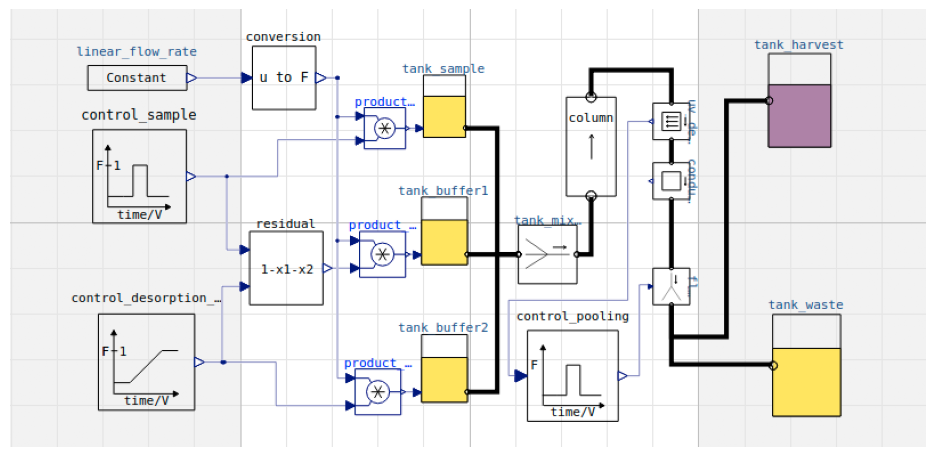

In [14]:
# The process diagram is made outside Modelica to illustrate the configuration
process_diagram()

In [15]:
describe('chromatography'); # print(); describe('liquidphase')

Ion exchange chromatorgraphy controlled with varying salt-concentration. The pH is kept constant.


## Loading or adsorption

The parameter notation and values are the same as in the referred report. However the flow rate is here denoted F while q in the report. The column is diveded in n=8 sections and set at compilation time. The values are arbitrarly chosen in the report and the focus is on qualitative aspects of the model.

The simplified model describe only the column in terms of volume and does not distinguish a high column with a small diameter from a lower with larger diameter.

The parameters k1, k2, k3, k4 and Q_av are given relative volume and with increased column volume a larger capacity is thus obtained.

Could not find cannot import name 'dopri5' from 'assimulo.lib' (/usr/local/lib/python3.12/site-packages/assimulo/lib/__init__.py)
Could not find cannot import name 'rodas' from 'assimulo.lib' (/usr/local/lib/python3.12/site-packages/assimulo/lib/__init__.py)
Could not find cannot import name 'odassl' from 'assimulo.lib' (/usr/local/lib/python3.12/site-packages/assimulo/lib/__init__.py)
Could not find ODEPACK functions.
Could not find RADAR5
Could not find GLIMDA.


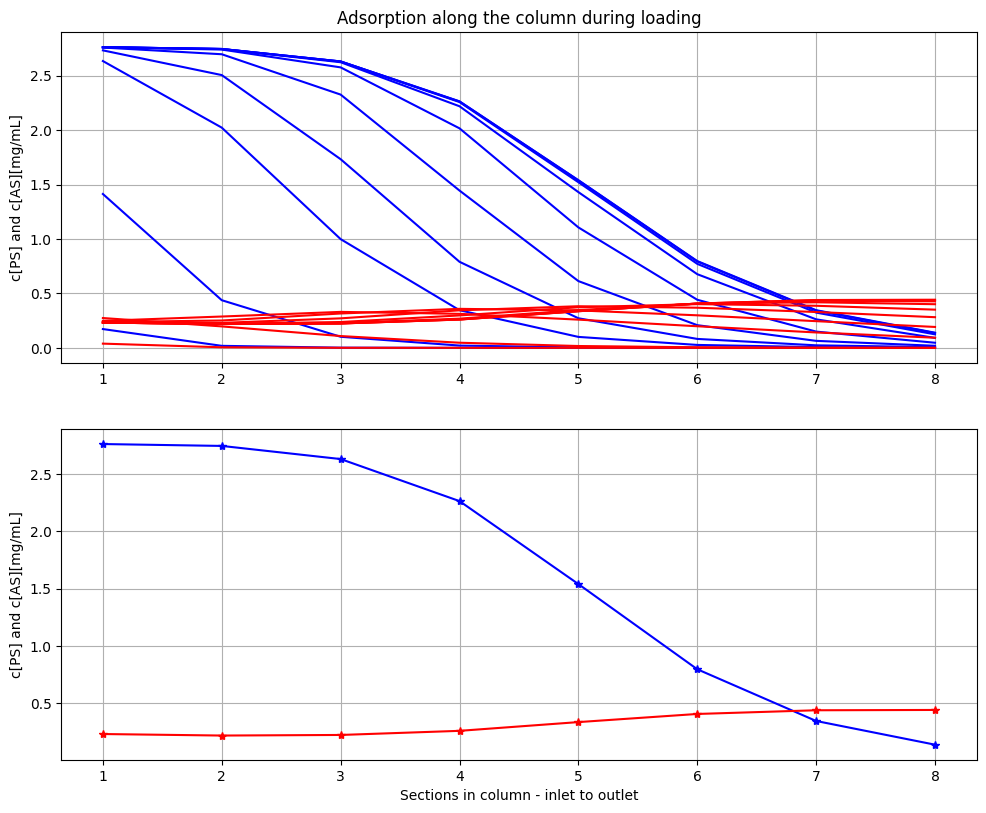

In [16]:
# Loading of the column - try to reproduce Jonas figure 13.
newplot(title='Adsorption along the column during loading', plotType='Loading')

# Sample
par(P_in=1.0, A_in=1.0, E_in=0)

# Column properties
par(k1=0.3, k2=0.05, k3=0.05, k4=0.3, Q_av=3.0)
par(height=20, diameter=0.714)
par(x_m=0.3)

# Operation
par(E_in_desorption_buffer=8)
par(LFR=12)
#par(scale_volume=False)
par(start_adsorption=0, stop_adsorption=50)
par(start_desorption=150, stationary_desorption=450)
par(start_pooling=220, stop_pooling=450)

# Simulation
simu(100)

The results are the same af Figure 13 in [1].

In [17]:
# We just check that we had the same volume flow rate as Jonas
describe('F')

 : 0.08


In [18]:
describe('V')

Column volume total - derived : 8.008 [ mL ]


In [19]:
model.get('column.x_m')

array([0.3])

In [20]:
model.get('column.V_m')

array([2.40235705])

In [21]:
#describe('column.n')

In [22]:
model.get('column.column_section[1].V_m')

array([0.30029463])

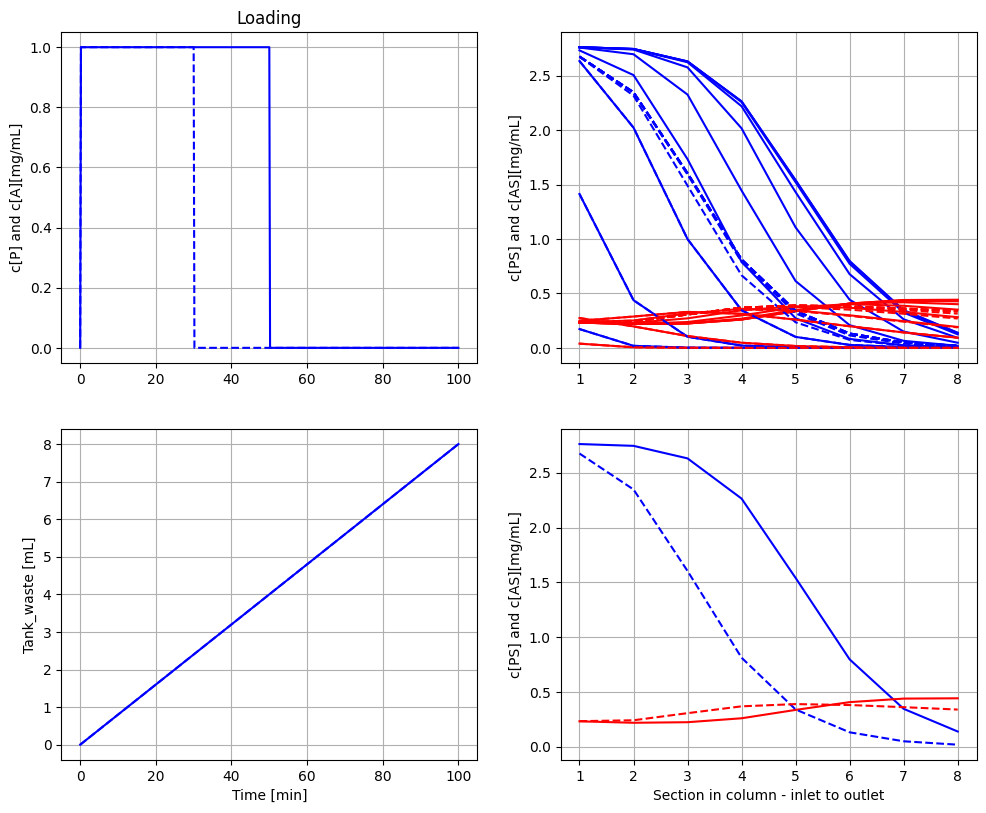

In [23]:
# Impact of shorter time for loading and then less material
newplot(title='Loading', plotType='Loading-combined')
show()

# Simulation with changed parameter t2
par(stop_adsorption=30); simu(100)

# Reset changed parameter
par(stop_adsorption=50)

To the left the inlet loading over time.
To the right upper concentration along the column at different times and in steady states finally
To the right lower concentrations along the colunn in steady state.

We see that a shorter time and then less material makes less of the column capacity used.

Note that the flow through the column is constant despite change from sample to just buffer 1, and shown in how the volume of the waste tank increase with time.

## Elution or desorption

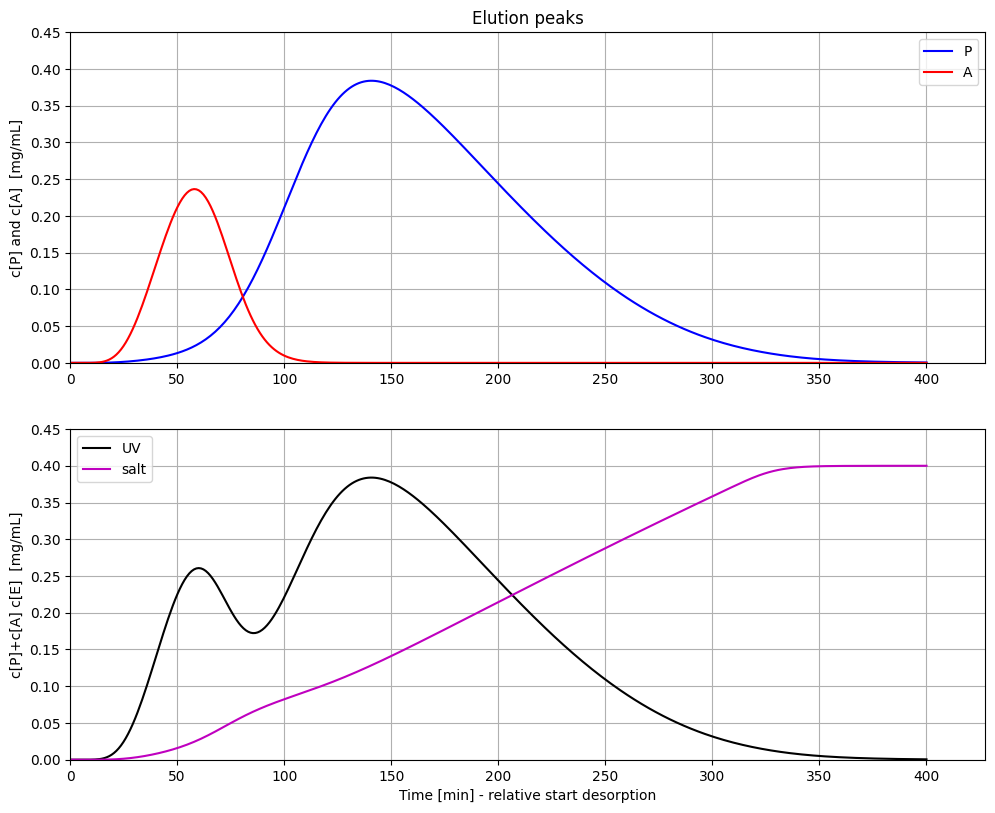

In [24]:
# Elution of the column
newplot(title='Elution peaks', plotType='Elution')

# Sample
par(P_in=1, A_in=1.0, E_in=0)

# Operation
par(E_in_desorption_buffer=8)
par(LFR=12.0, start_adsorption=0, stop_adsorption=50, start_desorption=150, stationary_desorption=450)

# Simulation
simu(550)

The results are the same af Figure 14 in [1].

The upper diagrams shows the column outlet concentrations of P and A over time.

The lower diagram shows the sum (or possibly the UV signal) at column outlet as well as the salt concentration. We have some separation between the two peaks.

Note that the salt concentration deviates slightly from the linear increse between time 50 to 100. This is due to ion interaction with P and A in the column. This is phenomenon can also be seen in real data.
The ion-salt concentration is scaled with factor 0.05 to get comparable concentrations to P and A.

I have here simulated time 150 of adsorbtion and then started elution. Here is time counted as zero at time of start of elutions. Not sure how long Jonas simulated to get steady state before he did elution.

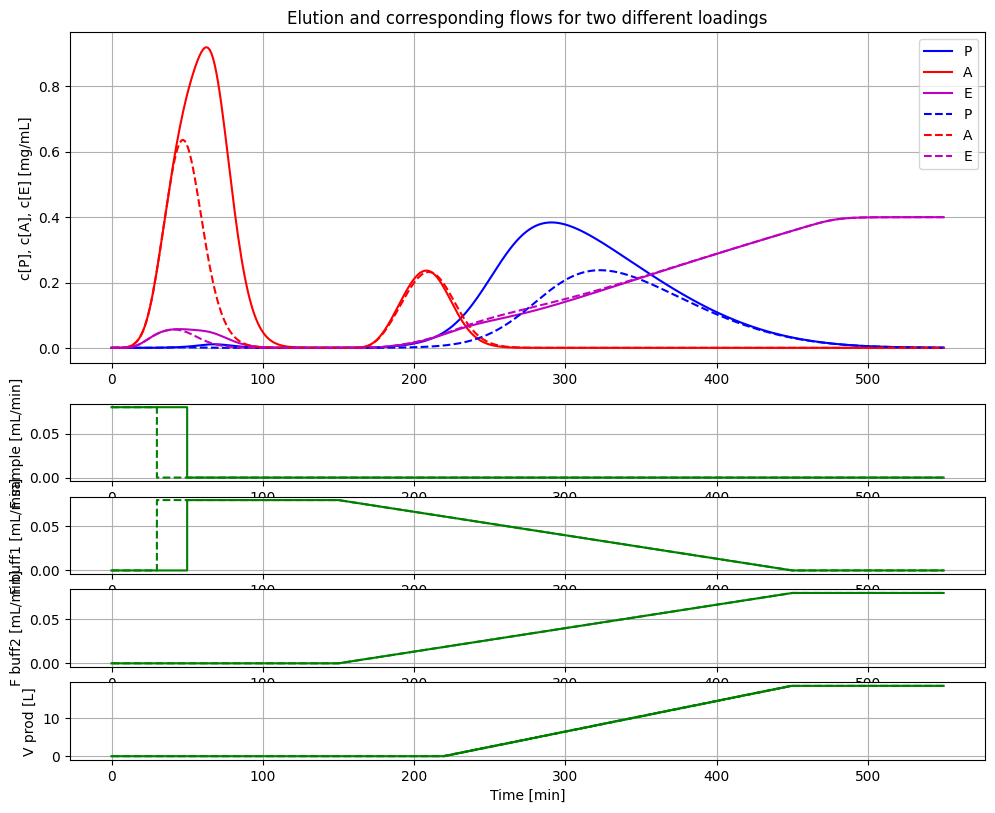

In [25]:
# More complete visualization of the elution phase and the different flows
newplot(title='Elution and corresponding flows for two different loadings', plotType='Elution-combined')
par(stop_adsorption=50); simu(550)

# Simulation with changed parameter t2
par(stop_adsorption=30); simu(550)

# Reset changed parameter
par(stop_adsorption=50)

Here a diagram that shows the peaks at the outlet as shown in the previous diagram. Below the flow rates of the three differnet sorces. Here time is 0 at start of adsorbtion and elution starts at time 150.

Automatic pooling based on UV-mmeasurement is tested in another notebook.

## Change of resin properties

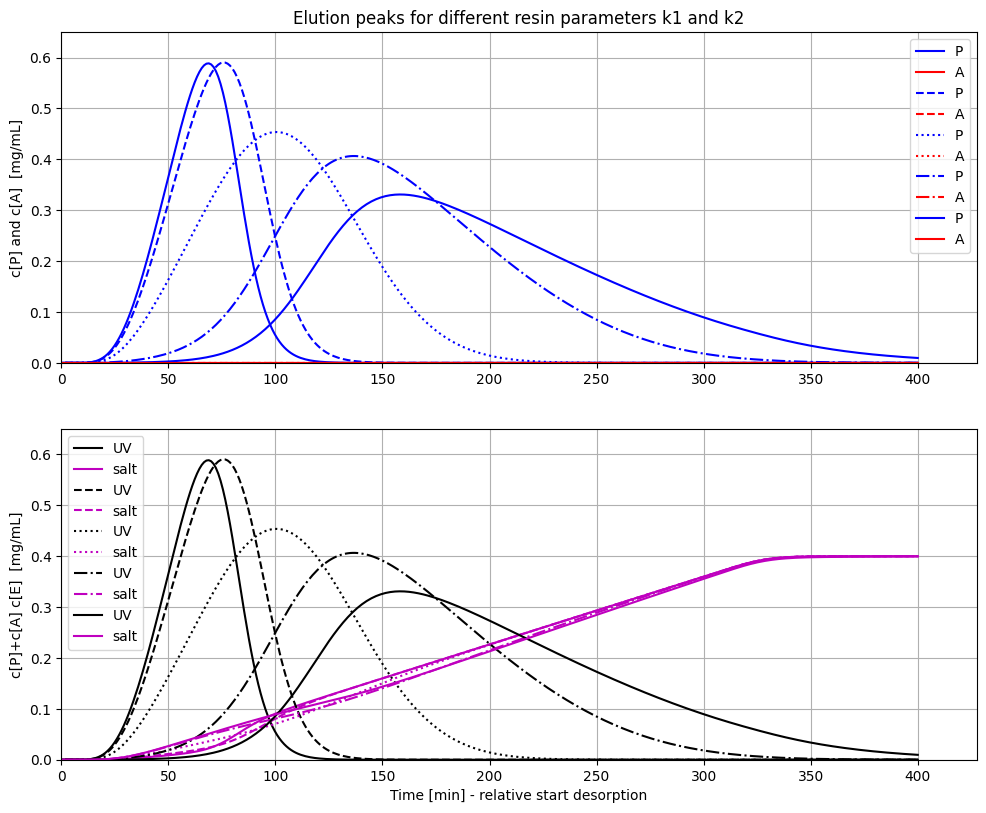

In [26]:
# Elution of the column
newplot(title='Elution peaks for different resin parameters k1 and k2', plotType='Elution')

# Sample
par(P_in=1, A_in=0.0, E_in=0)

# Operation
par(E_in_desorption_buffer=8)
par(LFR=12.0, start_adsorption=0, stop_adsorption=50, start_desorption=150, stationary_desorption=450)

# Simulations
par(k1=0.05, k2=0.50); simu(550)
par(k1=0.05, k2=0.25); simu(550)
par(k1=0.05, k2=0.05); simu(550)
par(k1=0.25, k2=0.05); simu(550)
par(k1=0.50, k2=0.05); simu(550)

# Adjust diagrams
ax1.set_ylim([0, 0.65])
ax2.set_ylim([0, 0.65])
plt.show()

The results are the same af Figure 17 in [1].

## Summary
Three important diagrams Figure 13, 14 and 17 in the original report [1] were reproduced and the implementation in Modelica used here is considered validated.

The model is now extended with an improved parametrization of the column that match the industrial practice.

## Acknowledgement

The author thank Karl Johan Brink for sharing his know-how of chromatography operation.
He has especially given input to how to parametrize the model in terms often used in the industrial practice.

## References

1) Månsson, Jonas, "Control of chromatography comlumn in production scale", Master thesis TFRT-5599, Department of Automatic Control, LTH, Lund Sweden, 1998.

2) Pharmacia LKB Biotechnology. "Ion Exchange chromatography. Principles and Mathods.", 3rd edition, 1991.

## Appendix

In [27]:
describe('MSL')

MSL: 4.1.0 - used components: RealInput, RealOutput, CombiTimeTable, Types


In [28]:
system_info()


System information
 -OS: Linux
 -Python: 3.12.11
 -Scipy: not installed in the notebook
 -PyFMI: 2.18.0
 -FMU by: OpenModelica Compiler OpenModelica 1.26.0~dev-200-gcb3254b
 -FMI: 2.0
 -Type: FMUModelME2
 -Name: Column_system
 -Generated: 2025-07-25T20:02:19Z
 -MSL: 4.1.0
 -Description: Bioprocess Library version 2.3.1
 -Interaction: FMU-explore version 1.0.0
